In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_html('https://www.zippia.com/user-experience-designer-jobs/demographics/')
len(data)

19

In [6]:
table_data = data[1]
table_data

,Year,Male,Female
0,2010,61.88%,38.12%
1,2011,62.12%,37.88%
2,2012,61.35%,38.65%
3,2013,63.67%,36.33%
4,2014,61.60%,38.40%
5,2015,62.31%,37.69%
6,2016,61.25%,38.75%
7,2017,60.32%,39.68%
8,2018,62.43%,37.57%
9,2019,59.38%,40.62%


In [13]:
ux_data = pd.melt(
    table_data,
    id_vars='Year',
    value_vars=['Male', 'Female'],
    var_name='Gender',
    value_name='Percent'
)
ux_data['Percent'] = ux_data['Percent'].str.rstrip('%').astype('float')

ux_data = ux_data.astype({
    'Year': 'category',
    'Gender': 'category'
})

year_gender_group = ux_data.groupby(['Year', 'Gender'])

[Text(0.5, 0, '% Gender'),
 Text(0, 0.5, 'Year'),
 Text(0.5, 1.0, 'UX Designer Gender by Year')]

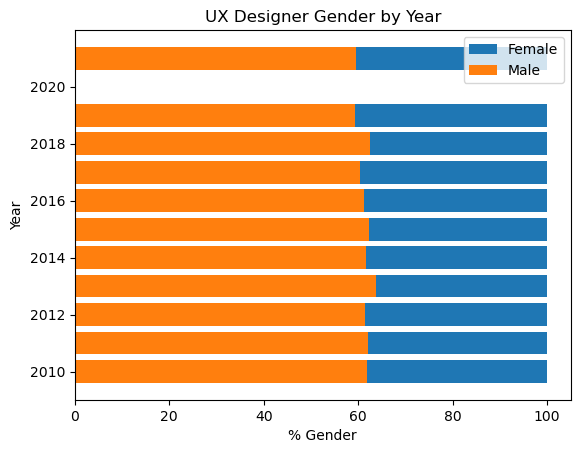

In [18]:
fig_1, ax_1=plt.subplots()

for idx, o in year_gender_group:
    if o.Gender.item() =='Male':
        ax_1.barh(o.Year, o.Percent, left=0, label='Male', color='tab:orange')
    else:
        start_loc = 100 - o.Percent
        ax_1.barh(o.Year, o.Percent, left=start_loc, label='Female', color='tab:blue')
            
ax_1.legend(['Female', 'Male'])

ax_1.set(xlabel='% Gender', ylabel='Year', title='UX Designer Gender by Year')

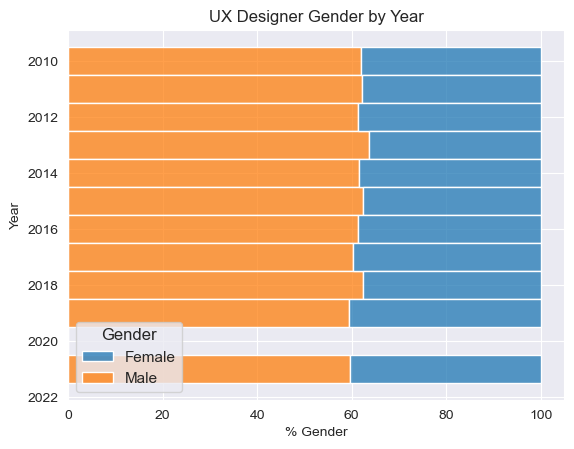

In [25]:
fig_2, ax_2 = plt.subplots()

sns.set_context('notebook')
sns.histplot(ux_data, y='Year', hue='Gender', weights='Percent', multiple='stack')

ax_2.set(xlabel='% Gender', ylabel='Year', title='UX Designer Gender by Year')

plt.show()

Question #5. I would say that Seaborn looks to provide roughly the same visual outputs as matplotlib.  While Seaborn appears to have some addition options for potential visualization “charts/graphs”, it seems limited by its “themes” where additional granularity to styling is afforded to matplotlib.  That granularity  in matplotlib comes at a premium in coding/syntax effort but seems able to provide one with the ability to provide a very specific output.


I think Seaborn and it’s more simplistic syntax allows for processing through larger amounts of data in a more simplified manner.   I also thing that leveraging the themes would allow for multiple visualizations to be generated quickly that support the same “story”.  For instance if I needed 4 different visualizations leveraging the same data, just in different ways, applying the same theme to these would aid in the cohesiveness of the story.  This simplicity would add efficiency to producing a final product. 
